Nama : Yunandra Wahyu Utama

Nim : 22.11.4703

Kelas : PDM 4

# **Project : Klasifikasi Kanker Paru-paru Menggunakan Convolutional Neural Network pada Citra CT Scan**

Reference :
1.   S. Jamdar, J. Vaddin, S. B. Nargundkar, and S. Patil, “Deep learning method for lung cancer identification and classification,” IAES Int. J. Artif. Intell., vol. 13, no. 1, pp.
1119–1128, 2024.
2.   S. Makubhai, G. R. Pathak, and P. R. Chandre, “Comparative analysis of explainable artificial intelligence models for predicting lung cancer using diverse datasets,” IAES
Int. J. Artif. Intell., vol. 13, no. 2, pp. 1978–1989, 2024.
3. S. Saxena and S. Narasimha Prasad, “Design of novel convolution neural network model for lung cancer detection by using sensitivity maps,” IAES Int. J. Artif. Intell., vol.
13, no. 3, pp. 3218–3227, 2024.
4. B. Krishna and G. M. Thimmaiah, “Advanced mask region-based convolutional neural network based deep-learning model for lung cancer detection,” IAES Int. J. Artif.
Intell., vol. 13, no. 1, pp. 1179–1186, 2024.
5. Muliadi, A. P. Windarto, Solikhun, and P. Alkhairi, “A revolutionary convolutional neural network architecture for more accurate lung cancer classification,” IAES Int. J.
Artif. Intell., vol. 14, no. 1, pp. 516–526, 2025.
6. R. Yousef and E. Y. Daraghmi, “Hybrid model detection and classification of lung cancer,” vol. 14, no. 2, pp. 1496–1506, 2025.
7. K. B. Chandraiah and N. K. Bhoganna, “An optimal model for detection of lung cancer using convolutional neural network,” Indones. J. Electr. Eng. Comput. Sci., vol. 34, no.
1, pp. 134–143, 2024.
8. D. Nam, A. Panina, A. Pak, and F. Hajiyev, “MetaLung: Meticulous affine-transformation-based lung cancer augmentation method,” Indones. J. Electr. Eng. Comput. Sci., vol.
36, no. 1, pp. 401–413, 2024.
9. A. Lakshmanarao, N. Gopal, N. Vullam, M. Sridhar, M. K. Kanth, and U. M. Rayudu, “Lung cancer detection using hybrid integration of autoencoder feature extraction
and ML techniques,” Indones. J. Electr. Eng. Comput. Sci., vol. 37, no. 1, pp. 416–424, 2025.
10. T. Manoharan, R. Velvizhi, T. K. Juluru, S. Kamal, S. Mallick, and E. Puliyanjalil, “Biomedical image classification using seagull optimization with deep learning for colon
and lung cancer diagnosis,” Indones. J. Electr. Eng. Comput. Sci., vol. 35, no. 3, pp. 1670–1679, 2024.


Kendala utama dalam prediksi kanker paru menggunakan Convolutional Neural Network (CNN) pada citra CT Scan meliputi keterbatasan kualitas dan jumlah dataset, kompleksitas struktur paru yang beragam, tingginya kebutuhan komputasi untuk pemrosesan citra beresolusi tinggi, kesulitan dalam mengidentifikasi lesi berukuran kecil, dan tantangan dalam mengurangi tingkat false positive yang dapat menyebabkan diagnosis yang tidak akurat.

**Dataset** = https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset

## **To Do List**


*   Setup library and import dataset from drive
*   Showing images
*   Making EDA
*   Preprocessing data
*   Spliting Data
*   Feature Extraction
*   Modeling + tuning
*   Evaluation
*   Evaluation
*   Selecting best model


## **1. Setup Library and Donwload Dataframe**

### Import Dataframe From Drive

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
%cd /content/drive/MyDrive/DM Project/Dataset

/content/drive/MyDrive/DM Project/Dataset


### Import Library

In [67]:
import os
import cv2
import numpy as np
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import random

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

## **2. Load Data and Showing the Data**

In [68]:
benign_path = '/content/drive/MyDrive/DM Project/Dataset/Bengin cases'
malignant_path = '/content/drive/MyDrive/DM Project/Dataset/Malignant cases'
normal_path = '/content/drive/MyDrive/DM Project/Dataset/Normal cases'
test_path = '/content/drive/MyDrive/DM Project/Dataset/Test cases'
all_paths = [benign_path, malignant_path, normal_path, test_path]

In [69]:
def show_images_by_case(path, limit):
    images = glob(path + '/*')
    plt.figure(figsize=(10, 10))
    for i in range(limit):
        plt.subplot(1, limit, i+1)
        plt.title(path.split('/')[-1])
        img = cv2.imread(images[i])
        img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

In [70]:
def show_images_all(limit):
    images = []
    for path in all_paths:
        images.extend(glob(path + '/*'))

    plt.figure(figsize=(10, 10))
    for i in range(limit):
        if i < len(images):
            plt.subplot(1, limit, i+1)
            img = cv2.imread(images[i])
            img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

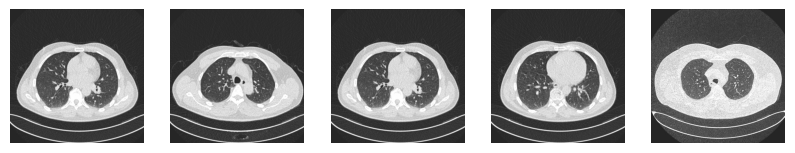

In [71]:
show_images_all(5)

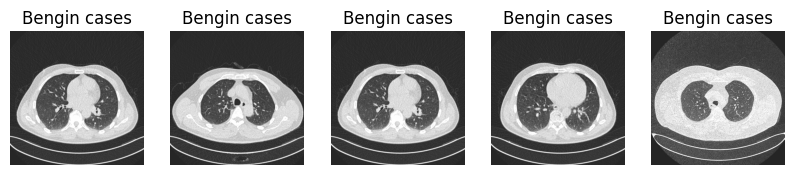

In [72]:
show_images_by_case(benign_path, 5)

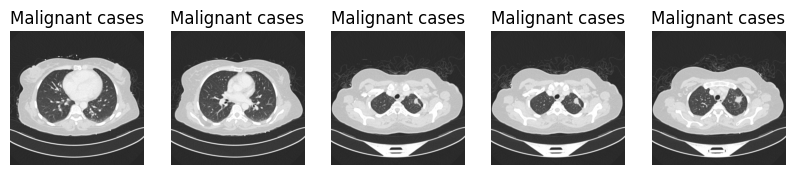

In [73]:
show_images_by_case(malignant_path, 5)

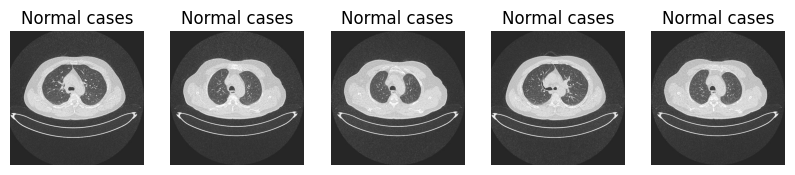

In [74]:
show_images_by_case(normal_path, 5)

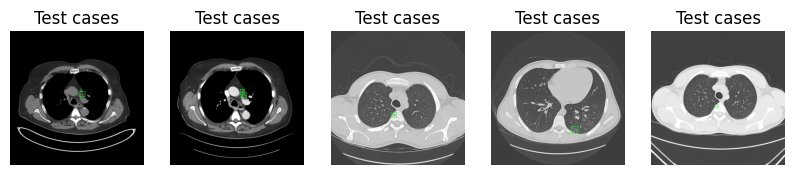

In [75]:
show_images_by_case(test_path, 5)

## **3. EDA**

In [76]:
def images_size_path(path):
     size = []
     for img in os.listdir(path):
         img_path = os.path.join(path, img)
         img = cv2.imread(img_path)
         size.append(img.shape)
         cases = path.split('/')[-1]
     return print(f'{cases}\n {size}')

In [77]:
images_size_path(benign_path)
images_size_path(malignant_path)
images_size_path(normal_path)
images_size_path(test_path)

Bengin cases
 [(512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512, 3), (512, 512,

In [78]:
print('Benign Cases :', len(os.listdir(benign_path)))
print('Malignant Cases :', len(os.listdir(malignant_path)))
print('Normal Cases :', len(os.listdir(normal_path)))
print('Test Cases :', len(os.listdir(test_path)))

Benign Cases : 120
Malignant Cases : 561
Normal Cases : 416
Test Cases : 197


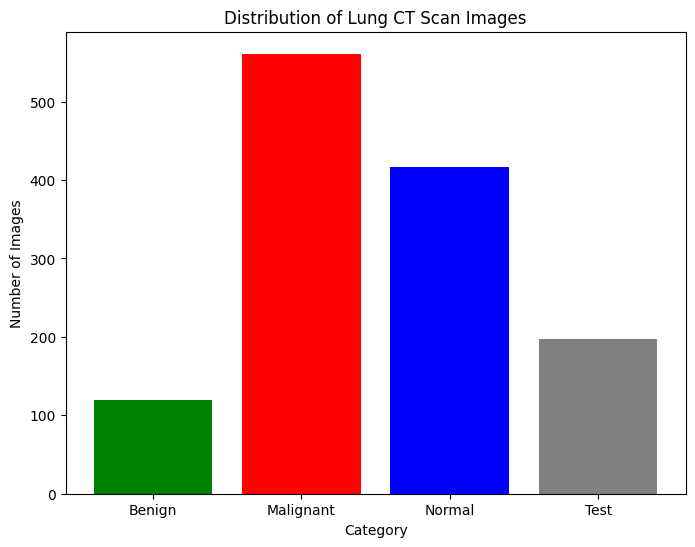

In [79]:
categories = ['Benign', 'Malignant', 'Normal', 'Test']
count_datas = [len(os.listdir(benign_path)),
              len(os.listdir(malignant_path)),
              len(os.listdir(normal_path)),
              len(os.listdir(test_path))]

plt.figure(figsize=(8, 6))
plt.bar(categories, count_datas, color=['green', 'red', 'blue', 'gray'])
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Distribution of Lung CT Scan Images")
plt.show()

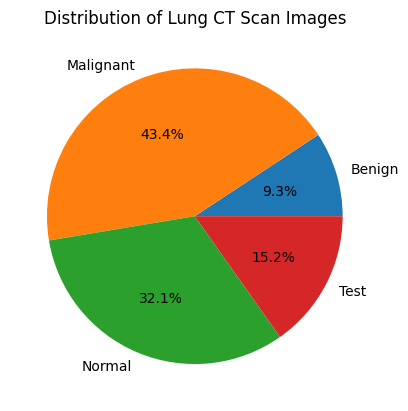

In [80]:
plt.pie(count_datas, labels=categories, autopct='%1.1f%%')
plt.title('Distribution of Lung CT Scan Images')
plt.show()

## **4. Preprocessing Data**

In [81]:
def add_label(dir, label):
    images = []
    labels = []
    for filename in os.listdir(dir):
        if filename.endswith('.jpg'): # All data was .jpg
            img_path = os.path.join(dir, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (299, 299))
                images.append(img)
                labels.append(label)
    return images, labels

In [82]:
benign_img, benign_label = add_label(benign_path, 0)
malignant_img, malignant_label = add_label(malignant_path, 1)
normal_img, normal_label = add_label(normal_path, 2)

In [83]:
images = benign_img + malignant_img + normal_img
labels = benign_label + malignant_label + normal_label

In [84]:
def images_size_pre(images):
     size = []
     for img in images:
         size.append(img.shape)
     return size
images_size_pre(images)

[(299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),
 (299, 299),

In [85]:
print(len(images))
print(len(labels))

1097
1097


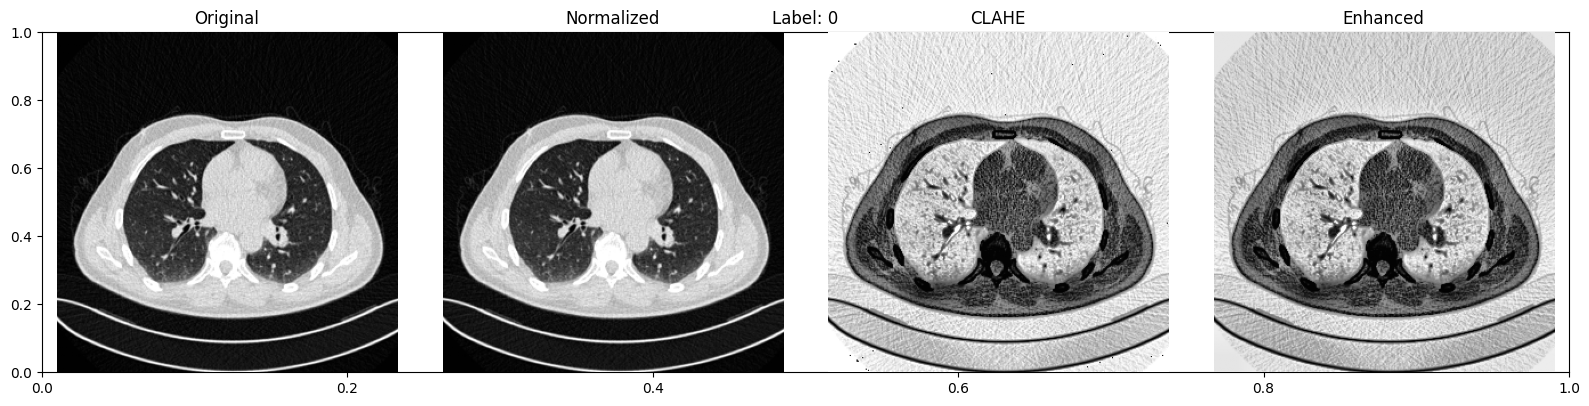

In [86]:
def normalize_image(img):
    norm_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_img

def apply_clahe(img, clip_limit=4.0, tile_grid_size=(8, 8)):
    img_8bit = np.uint8(img * 255)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size, )
    clahe_img = clahe.apply(img_8bit)
    return clahe_img

def enhance_image(img):
    enhanced = apply_clahe(img)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return enhanced

img = images[0]
label = labels[0]

normalized_img = normalize_image(img)
clahe_img = apply_clahe(normalized_img)
enhanced_img = enhance_image(img)

plt.figure(figsize=(16, 4))
plt.title(f"Label: {label}")

plt.subplot(1, 4, 1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Normalized")
plt.imshow(normalized_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("CLAHE")
plt.imshow(clahe_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Enhanced")
plt.imshow(enhanced_img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

## **5. Spliting Data**

In [87]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [88]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

877
220
877
220


## **6. Feature Extraction**

In [89]:
# Mengubah list ke numpy array dan tambahkan channel dimensi
X_train = np.array(X_train).reshape(-1, 299, 299, 1).astype('float32') / 255.0
X_test = np.array(X_test).reshape(-1, 299, 299, 1).astype('float32') / 255.0

In [90]:
# Mengubah label ke one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

## **7. Modeling**

In [126]:
from tensorflow.keras.callbacks import EarlyStopping

# Definisikan Early Stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', restore_best_weights=True)


In [127]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(299, 299, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [128]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [129]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.4531 - loss: 1.4274 - val_accuracy: 0.4773 - val_loss: 0.9615
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.4948 - loss: 0.9404 - val_accuracy: 0.6591 - val_loss: 0.8287
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6943 - loss: 0.7446 - val_accuracy: 0.7727 - val_loss: 0.6171
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.7515 - loss: 0.5895 - val_accuracy: 0.8125 - val_loss: 0.4693
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.7641 - loss: 0.5583 - val_accuracy: 0.7727 - val_loss: 0.4556
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8466 - loss: 0.4026 - val_accuracy: 0.8239 - val_loss: 0.3991
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.8507 - loss: 0.3311 - val_accuracy: 0.9148 - val_loss: 0.2390
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9407 - loss: 0.1860 - val_accuracy: 0.

## **8. Evaluation**

In [130]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.2f}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.9832 - loss: 0.0899
Test Accuracy: 0.99


In [136]:
model.save('/content/CNN_model.h5')

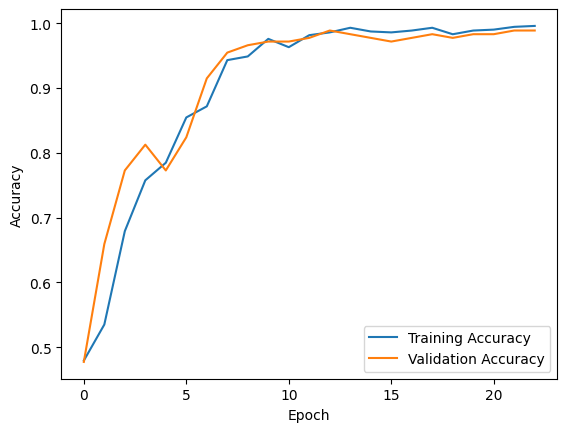

In [131]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

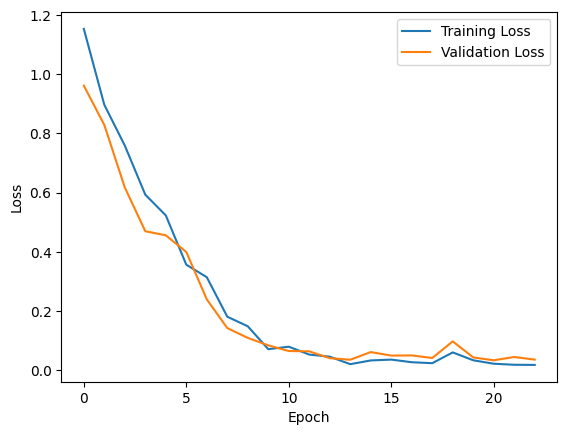

In [132]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [133]:
pred = model.predict(X_test)
y_pred = np.argmax(pred, axis=1)
y_true = np.argmax(y_test, axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


Confusion Matrix:
[[ 27   1   1]
 [  0 109   0]
 [  0   1  81]]


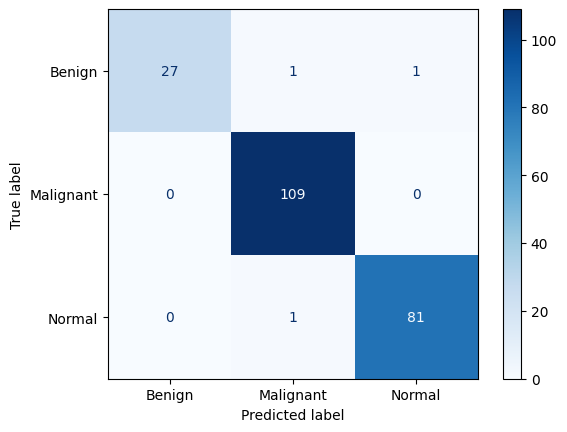

In [134]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant', 'Normal'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [135]:
# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Benign', 'Malignant', 'Normal']))

Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      0.93      0.96        29
   Malignant       0.98      1.00      0.99       109
      Normal       0.99      0.99      0.99        82

    accuracy                           0.99       220
   macro avg       0.99      0.97      0.98       220
weighted avg       0.99      0.99      0.99       220



In [138]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_28 (Conv2D)              │ (None, 297, 297, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 71, 71, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 35, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 33, 33, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 512)            │    33,554,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,832,971 (388.46 MB)

 Trainable params: 33,944,323 (129.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,888,648 (258.97 MB)

## **9. Testing**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
True Label: Benign
Predicted Label: Benign
Predicted Probabilities:
  Benign: 0.9320
  Malignant: 0.0027
  Normal: 0.0653


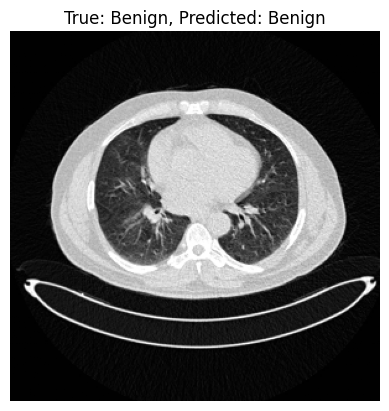

In [137]:
# Select a random image from the test dataset
random_index = random.randint(0, len(X_test) - 1)
random_image = X_test[random_index]
true_label_index = np.argmax(y_test[random_index])
true_label = ['Benign', 'Malignant', 'Normal'][true_label_index]

# Reshape the image for prediction (add batch dimension)
input_image = np.expand_dims(random_image, axis=0)

# Make a prediction
predictions = model.predict(input_image)

# Get the predicted probabilities for each class
probabilities = predictions[0]

# Get the predicted class index
predicted_label_index = np.argmax(probabilities)
predicted_label = ['Benign', 'Malignant', 'Normal'][predicted_label_index]

# Print the results
print(f"True Label: {true_label}")
print(f"Predicted Label: {predicted_label}")
print("Predicted Probabilities:")
for i, prob in enumerate(probabilities):
    print(f"  {['Benign', 'Malignant', 'Normal'][i]}: {prob:.4f}")

# Display the image
plt.imshow(random_image.squeeze(), cmap='gray')
plt.title(f"True: {true_label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()